# **Introduction to Tensor Flow** - *Inspiré de la formation de Thibault Neveu*

# 0. Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

# 1. Be sure to use Tensorflow 2.0

In [2]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

# 2. Load the dataset : Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [3]:
from sklearn.preprocessing import StandardScaler

# Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(10000, 784)
(10000,)


# 3. Plot one of the data

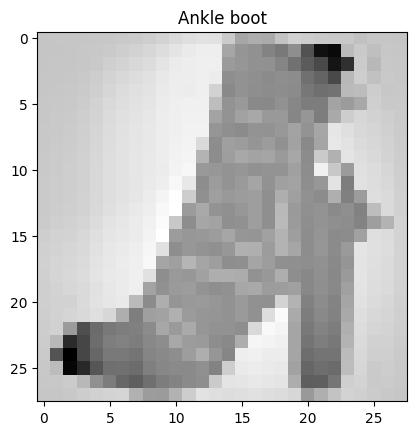

In [4]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# 4. Create the model

In [5]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.01358494 0.01719402 0.73695016 0.04334068 0.01827793 0.02184969
  0.03554358 0.03271602 0.00836478 0.07217822]] [9]


# 5. Model Summary

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (1, 256)                    │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 128)                    │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (1, 10)                     │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

# 6. Compile the model

In [7]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

# 7. Train the model

In [8]:
history = model.fit(images, targets, epochs=5, batch_size=1, validation_split=0.2)

Epoch 1/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.7225 - loss: 0.8098 - val_accuracy: 0.7765 - val_loss: 0.6088
Epoch 2/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8314 - loss: 0.4560 - val_accuracy: 0.8175 - val_loss: 0.5021
Epoch 3/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8598 - loss: 0.3907 - val_accuracy: 0.8150 - val_loss: 0.5704
Epoch 4/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.8683 - loss: 0.3768 - val_accuracy: 0.8355 - val_loss: 0.5189
Epoch 5/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8819 - loss: 0.3226 - val_accuracy: 0.8340 - val_loss: 0.5393


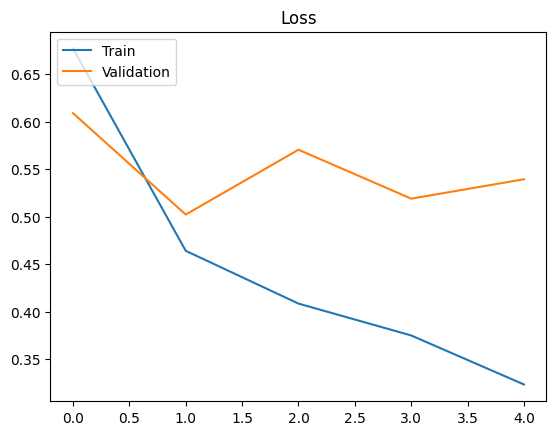

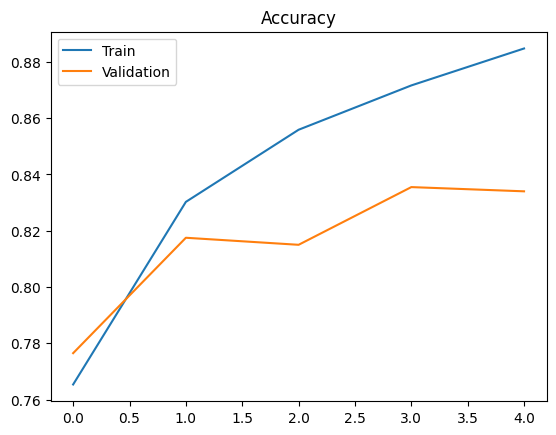

In [9]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Validation")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Validation")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [10]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8359 - loss: 0.5672
Test Loss 0.6023252010345459
Test Accuracy 0.8274999856948853


In [11]:
model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[5.05769905e-13 9.61125385e-13 2.89250317e-15 1.03515795e-14
  1.34870032e-14 6.77323052e-13 1.14904752e-11 4.54117242e-08
  1.38528566e-12 1.00000000e+00]] [9]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


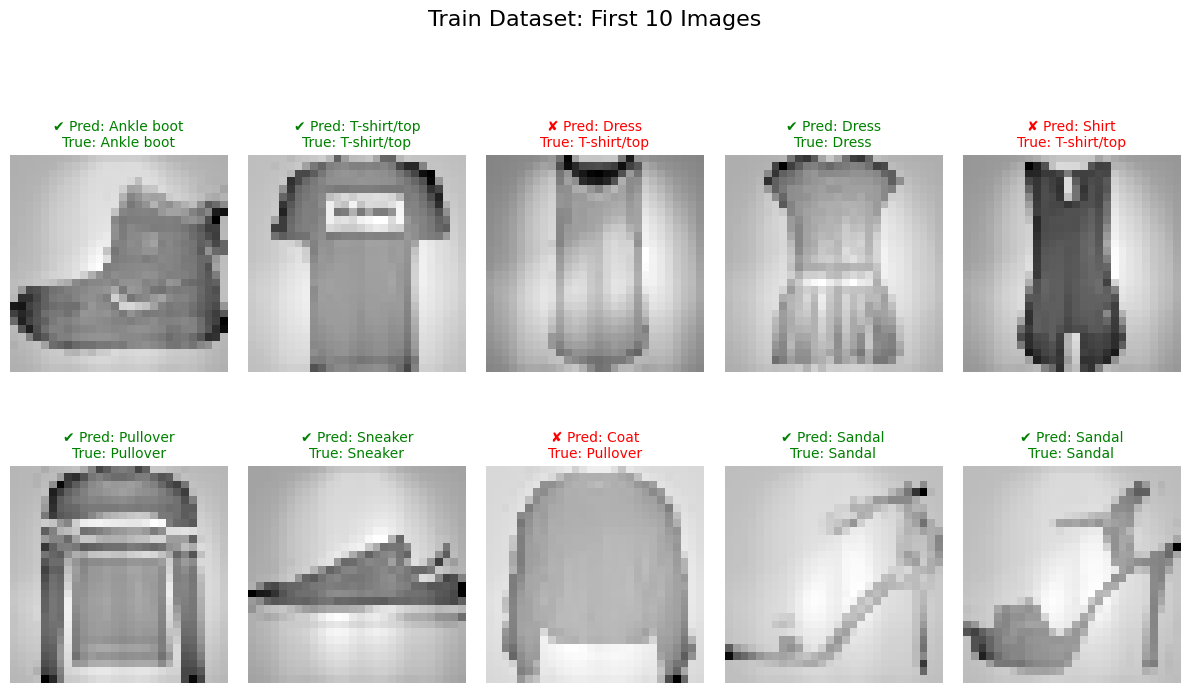

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


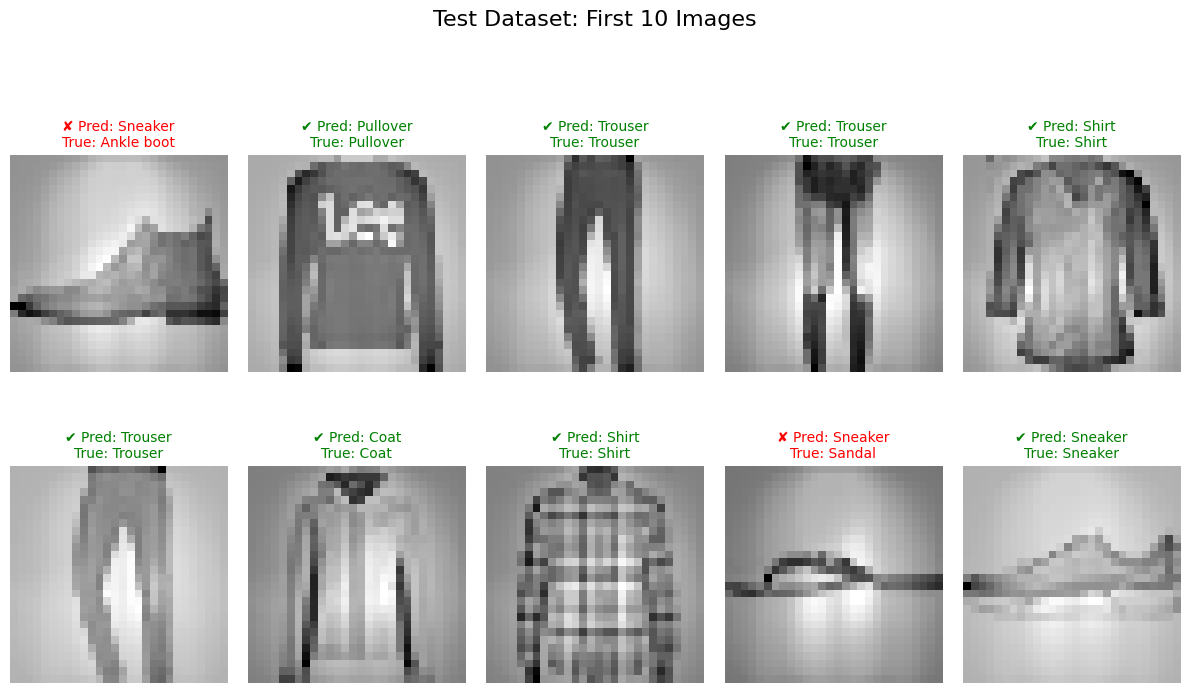

In [12]:
# Fonction pour tracer les images avec les prédictions et les vrais labels
def plot_images_with_predictions(images, targets, model, dataset_type="Train"):
    # Redimensionnement des images pour l'affichage
    images_reshaped = images.reshape(-1, 28, 28)
    # Prédiction sur les 10 premières images
    predictions = model.predict(images[:10])
    predicted_labels = np.argmax(predictions, axis=1)

    # Configuration de l'affichage
    plt.figure(figsize=(12, 8))  # Taille de la figure ajustée
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images_reshaped[i], cmap='binary')
        # Vérification de la prédiction correcte
        if predicted_labels[i] == targets[i]:
            title_color = 'green'
            check = u"\u2714"  # Unicode for check mark
        else:
            title_color = 'red'
            check = u"\u2718"  # Unicode for cross mark

        plt.title(f"{check} Pred: {targets_names[predicted_labels[i]]}\nTrue: {targets_names[targets[i]]}", fontsize=10, color=title_color)
        plt.axis('off')
    plt.suptitle(f"{dataset_type} Dataset: First 10 Images", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=2.5, w_pad=1.5)  # Ajustement de l'espacement
    plt.show()

# Exemple d'utilisation avec votre modèle et données
plot_images_with_predictions(images, targets, model, dataset_type="Train")
plot_images_with_predictions(images_test, targets_test, model, dataset_type="Test")


# 8. Save the model

In [13]:
# sudo pip install h5py
model.save('simple_nn.h5')

# Sauvegarder le modèle au format natif Keras
model.save('simple_nn.keras')

# 9. Load the saved model

In [14]:
# Load the saved model
loaded_model = tf.keras.models.load_model("simple_nn.keras")
loss, acc = loaded_model.evaluate(images_test, targets_test)

print("Loss", loss)
print("Acc", acc)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8359 - loss: 0.5672
Loss 0.6023252010345459
Acc 0.8274999856948853
